# Introduction

Dans le cadre du projet d'ANDO (Analyse de données), on souhaite étudier un jeu de données sur les habitudes et comportements de consommateurs en magasin. Après avoir analysé le dataset, réaliser un preprocessing, on va ensuite implémenter différentes méthodes pour déterminer des patterns au sein du jeu de données.

## Import des librairies

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [70]:
import warnings
warnings.filterwarnings("ignore")


## Import du jeu de données et description rapide

In [71]:
df = pd.read_csv('marketing_campaign.xls', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [72]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [73]:
df.shape

(2240, 29)

Le dataset contient 29 variables et 2240 observations.

In [74]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Le dataframe ne présente aucune valeur manquante (NaN). Aucun travail de remplacement ou de suppression n'est alors à réaliser dessus. Il faudra tout de même traiter certaines valeurs aberrantes.

In [75]:
df.dropna(inplace=True)

## Premières observations

In [76]:
df["Age"] = 2014 - df["Year_Birth"]
df["Age"].sort_values(ascending=False)

239     121
339     115
192     114
1950     74
424      73
       ... 
995      19
1850     19
747      19
1170     18
46       18
Name: Age, Length: 2216, dtype: int64

In [77]:
df["Income"].sort_values(ascending=False)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
          ...   
1975      4428.0
1846      4023.0
1524      3502.0
21        2447.0
1245      1730.0
Name: Income, Length: 2216, dtype: float64

On observe certaines valeurs aberrantes au niveau de l'âge et des revenus observés. En effet, certaines personnes ont plus de 115 ans ce qui est aux alentours du record de longévité humaine. On décide d'écarter ces observations. Pour les revenus, une valeur aberrante à 666666$ est observée et donc retirée du dataset.

In [78]:
df = df[df["Age"] < 110]
df = df[df["Income"] < 250000]

On peut désormais tracer les distributions d'âges et de revenus.

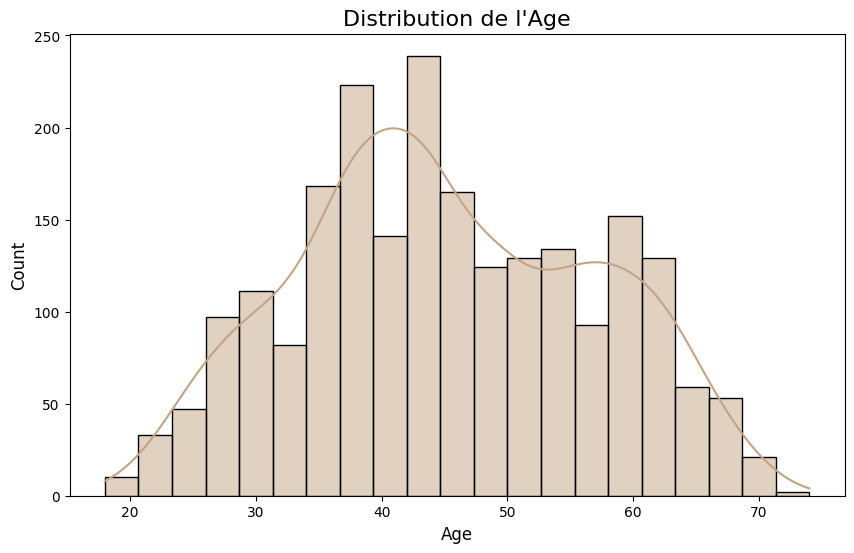

In [79]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', kde=True, color="#C4A484")
plt.title("Distribution de l'Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

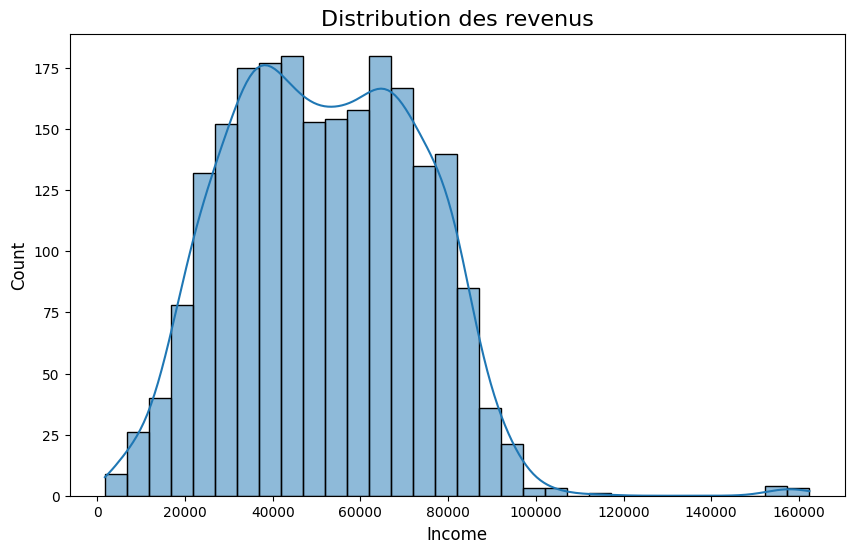

In [80]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Income', kde=True)
plt.title("Distribution des revenus", fontsize=16)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

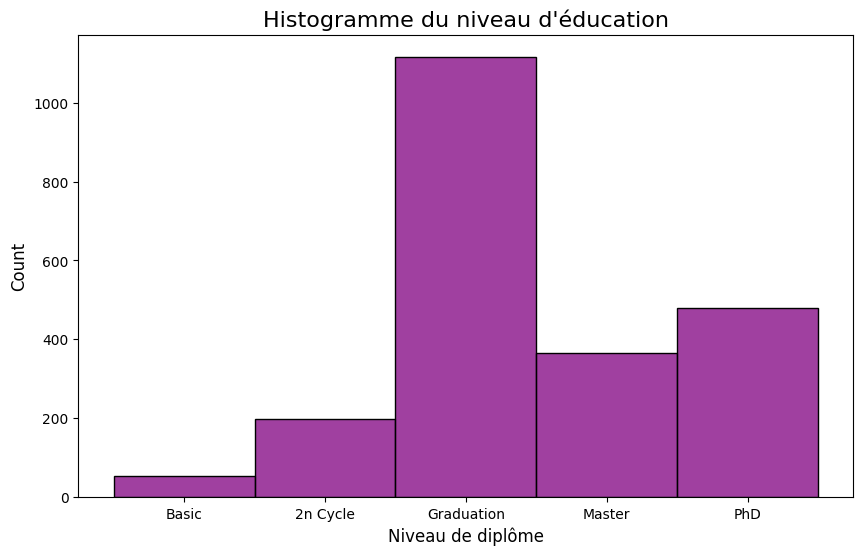

In [81]:
education_order = ["Basic", "2n Cycle", "Graduation", "Master", "PhD"]

# conversion en type catégoriel avec un ordre choisi
df['Education'] = pd.Categorical(df['Education'], categories=education_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Education', color="purple")
plt.xlabel("Niveau de diplôme", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogramme du niveau d'éducation", fontsize=16)
plt.show()

In [82]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Certaines valeurs de situations maritales semblent aberrantes. On les remplace ou supprime du dataset selon le cas.

In [83]:
df.replace("Alone", "Single", inplace = True)
df.drop(df[df["Marital_Status"] == "Absurd"].index, inplace=True)
df.drop(df[df["Marital_Status"] == "YOLO"].index, inplace=True)

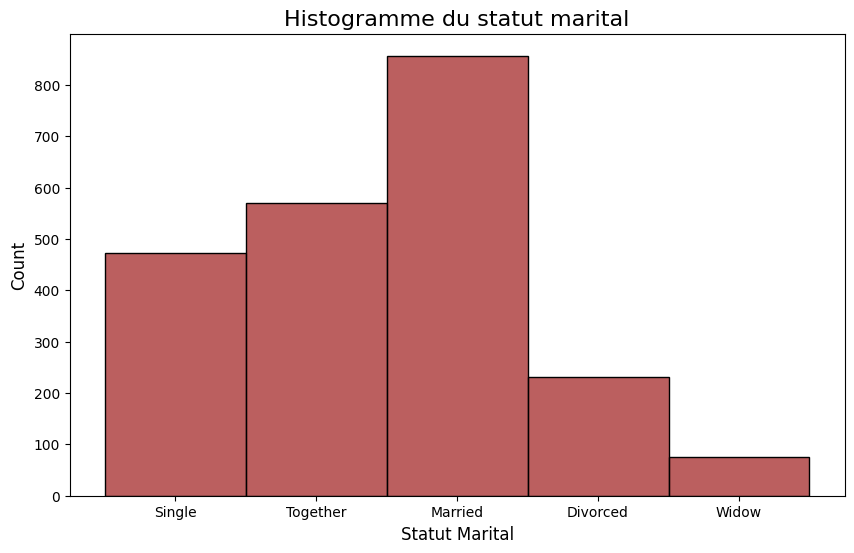

In [84]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Marital_Status', color="brown")
plt.xlabel("Statut Marital", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogramme du statut marital", fontsize=16)
plt.show()

In [85]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

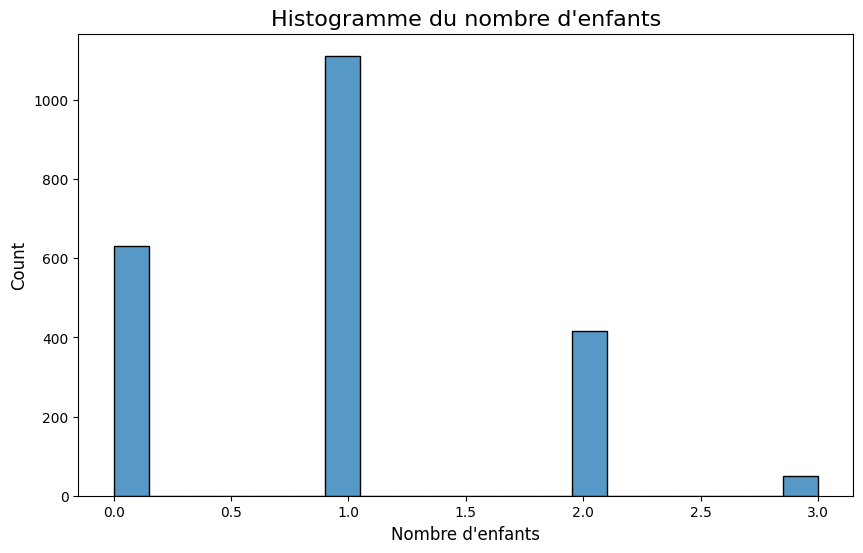

In [86]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Children')
plt.xlabel("Nombre d'enfants", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogramme du nombre d'enfants", fontsize=16)
plt.show()

In [87]:
# on convertit la colonne en format datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# on extrait l'année de la colonne "Dt_Customer"
df['Year_First_Purchase'] = df['Dt_Customer'].dt.year

# on calcule le nombre de jours depuis le premier achat, on prend la date de dernier achat enregistré dans le dataset comme référence
today = datetime(2014, 6, 30)
df['Days_Since_First_Purchase'] = (today - df['Dt_Customer']).dt.days

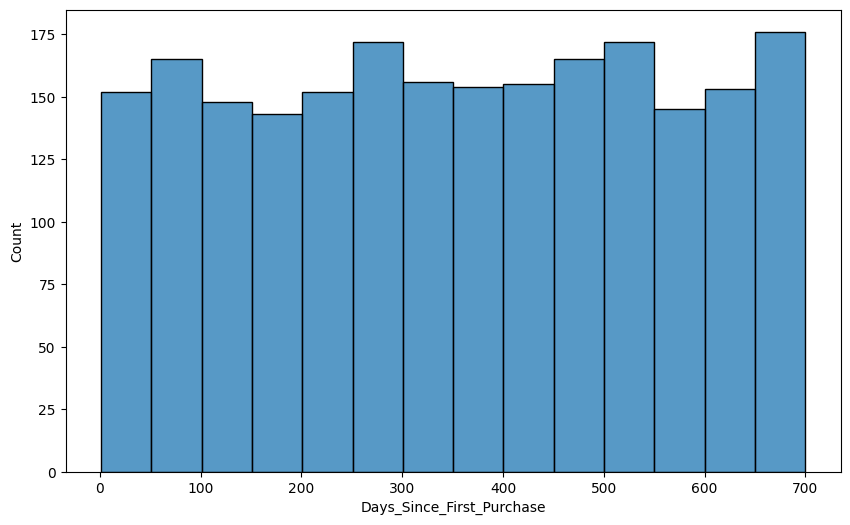

In [88]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Days_Since_First_Purchase')
plt.show()

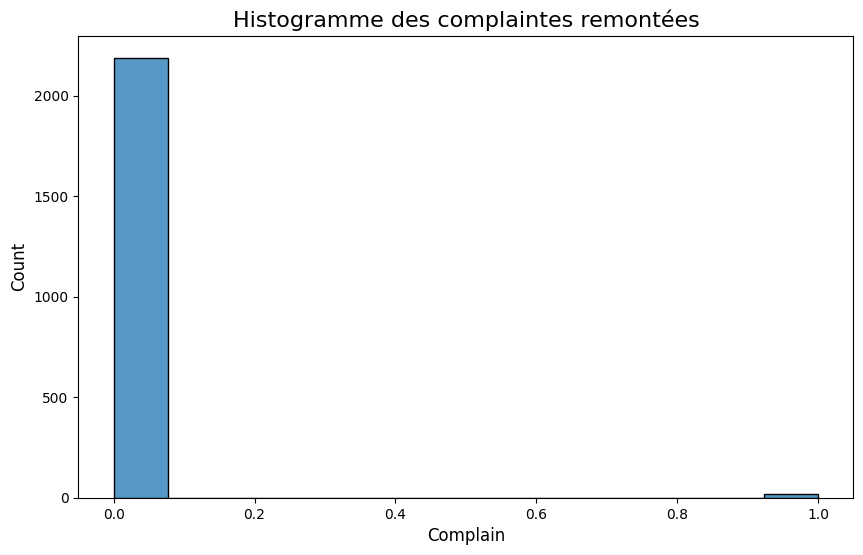

In [89]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Complain')
plt.xlabel("Complain", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogramme des complaintes remontées", fontsize=16)
plt.show()

In [90]:
df["Complain"].value_counts()

Complain
0    2188
1      20
Name: count, dtype: int64

Il y a très peu de personnes (mmoins de 1%) s'étant plaint de leurs achats auprès du magasin ou SAV, cette variable n'est donc peut être pas significative et utilisable dans notre étude.

# Analyse des produits

On stocke les variables correpondants aux différentes catégories de produits

In [91]:
products = ["MntWines", "MntMeatProducts", "MntGoldProds", "MntFishProducts", "MntSweetProducts", "MntFruits"]

On souhaite connaître les catégories de produits dans lesquelles les clients observés dépensent le plus.

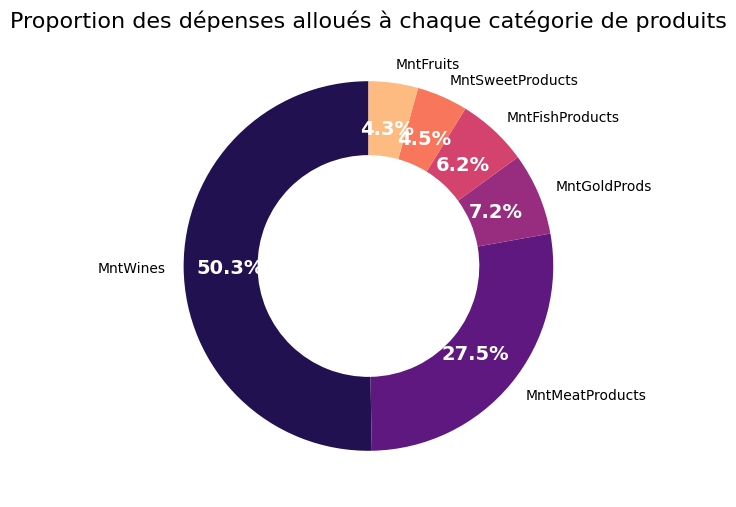

In [92]:
total_spend = df[products].sum().sort_values(ascending=False)


colors = sns.color_palette("magma", len(products))
plt.figure(figsize=(10,6))
wedges, texts, autotexts = plt.pie(total_spend, labels=products, autopct='%1.1f%%',
                                   startangle=90, colors=colors, wedgeprops=dict(width=0.4), pctdistance=0.75)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_weight('bold')

plt.title('Proportion des dépenses alloués à chaque catégorie de produits', fontsize=16)

plt.show()

In [93]:
total_spend

MntWines            673941
MntMeatProducts     368745
MntGoldProds         96672
MntFishProducts      82860
MntSweetProducts     59760
MntFruits            58066
dtype: int64

Maintenant, regardons quels canaux d'achats sont privilégiés.

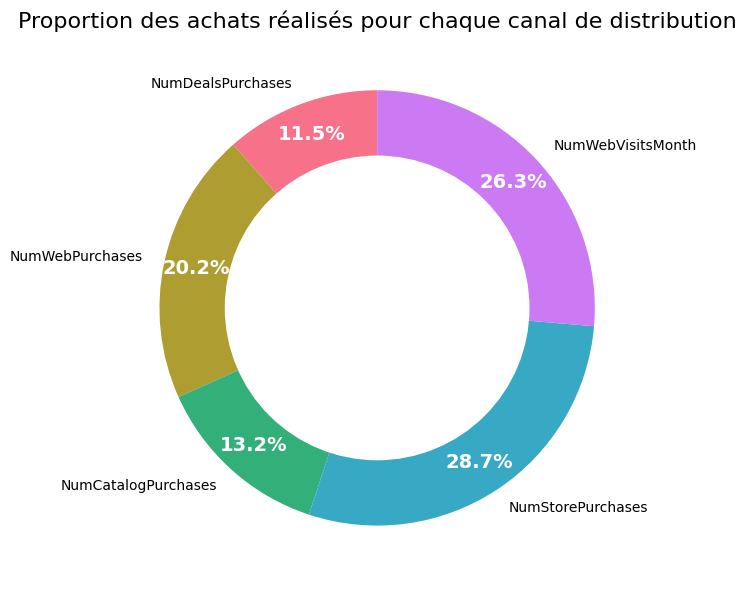

In [94]:
products_canal = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
total_spend2 = df[products_canal].sum()

data = {
    'Product Category': products_canal,
    'Total Spending': total_spend2
}
data = pd.DataFrame([data])

# on crée les données pour le graphique
categories = products_canal
values = total_spend2.values

# choix de la palette de couleurs
colors = sns.color_palette("husl", len(categories))

# création du graphique
fig, ax = plt.subplots(figsize=(10,6))
wedges, texts, autotexts = ax.pie(
    values,
    labels=categories,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors=colors
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_weight('bold')

ax.set_title("Proportion des achats réalisés pour chaque canal de distribution", fontsize=16)
plt.tight_layout()
plt.show()

## Analyse des différentes catégories de produits

In [95]:
df["MntWines"].mean()

305.22690217391306

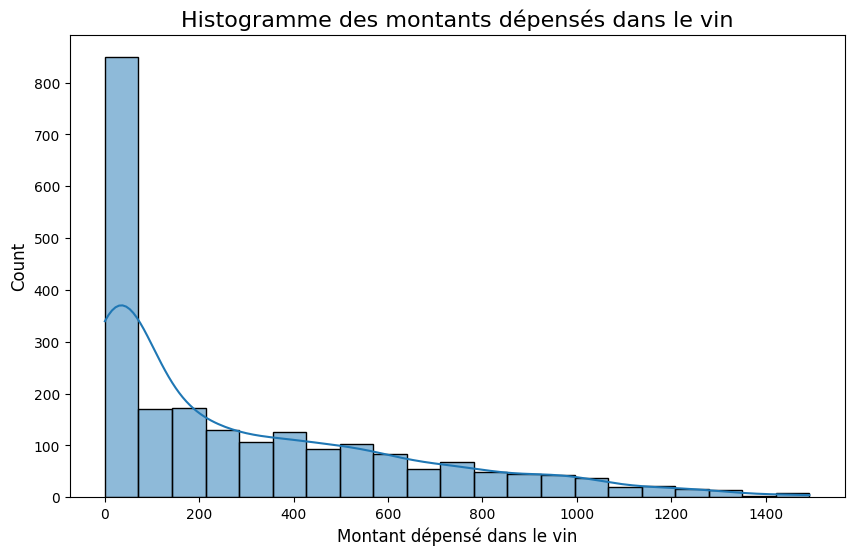

In [96]:
plt.figure(figsize=(10,6))
sns.histplot(df["MntWines"], kde=True)
plt.xlabel("Montant dépensé dans le vin", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogramme des montants dépensés dans le vin", fontsize=16)
plt.show()

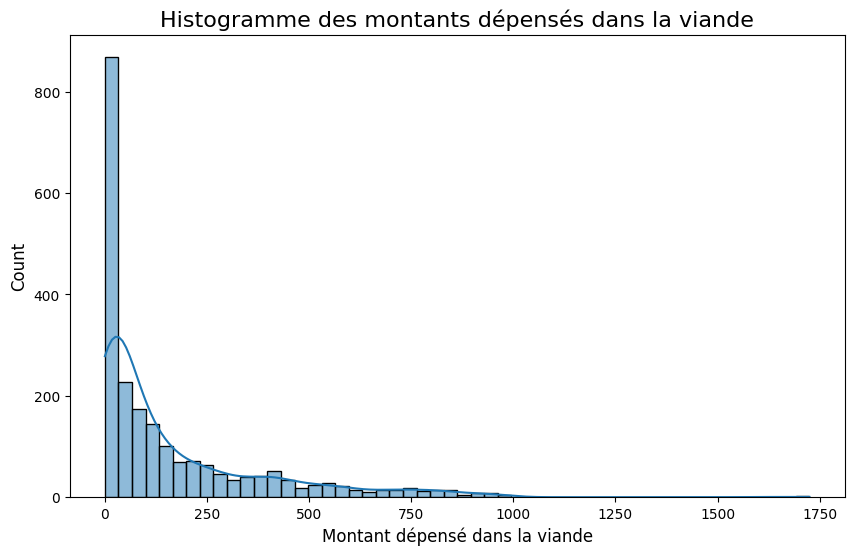

In [97]:
plt.figure(figsize=(10,6))
sns.histplot(df["MntMeatProducts"], kde=True)
plt.xlabel("Montant dépensé dans la viande", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogramme des montants dépensés dans la viande", fontsize=16)
plt.show()

In [98]:
df_low_meat = df[df["MntMeatProducts"] < 25]
df_low_meat.shape

(751, 33)

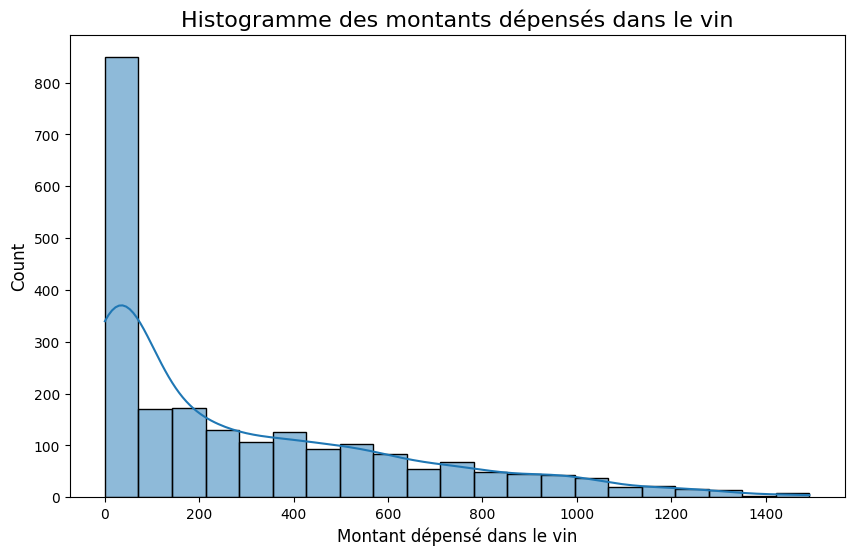

In [99]:
plt.figure(figsize=(10,6))
sns.histplot(df["MntWines"], kde=True)
plt.xlabel("Montant dépensé dans le vin", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogramme des montants dépensés dans le vin", fontsize=16)
plt.show()

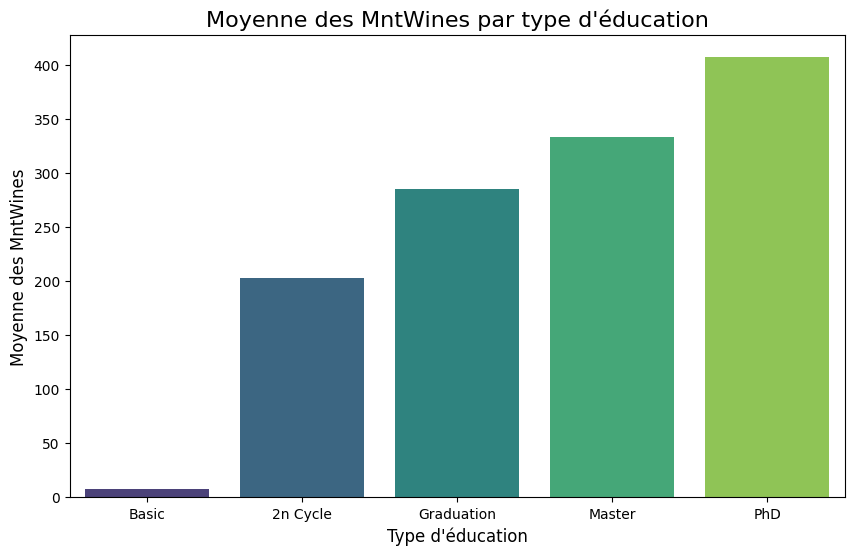

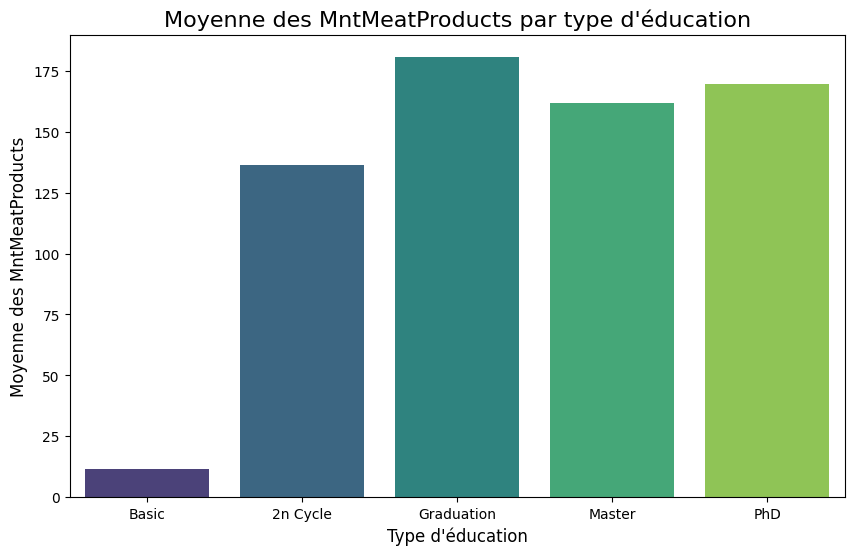

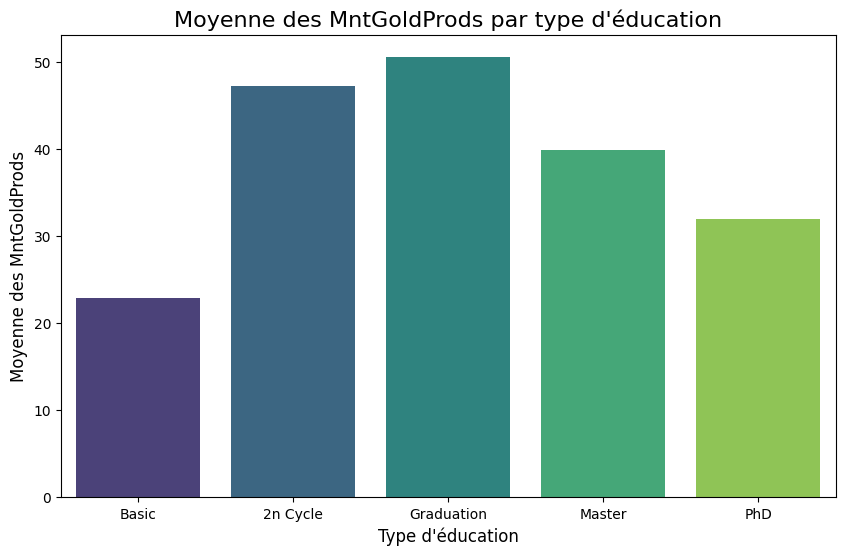

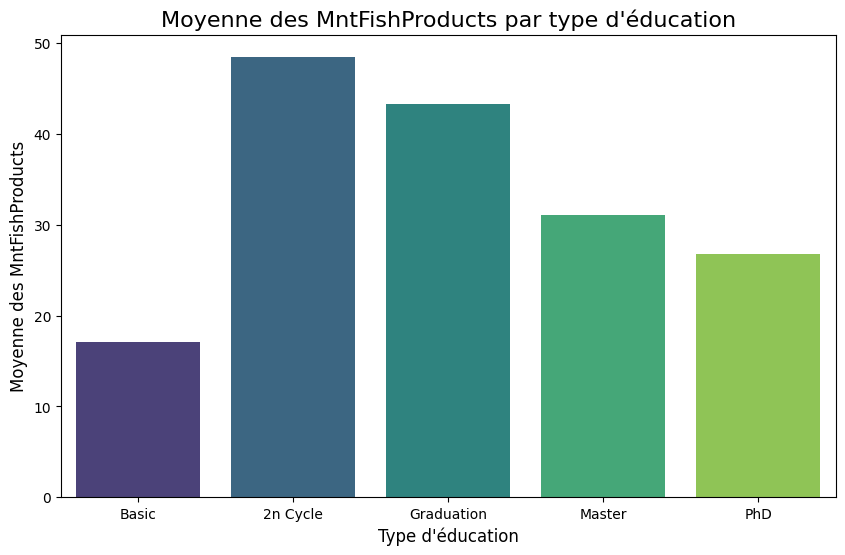

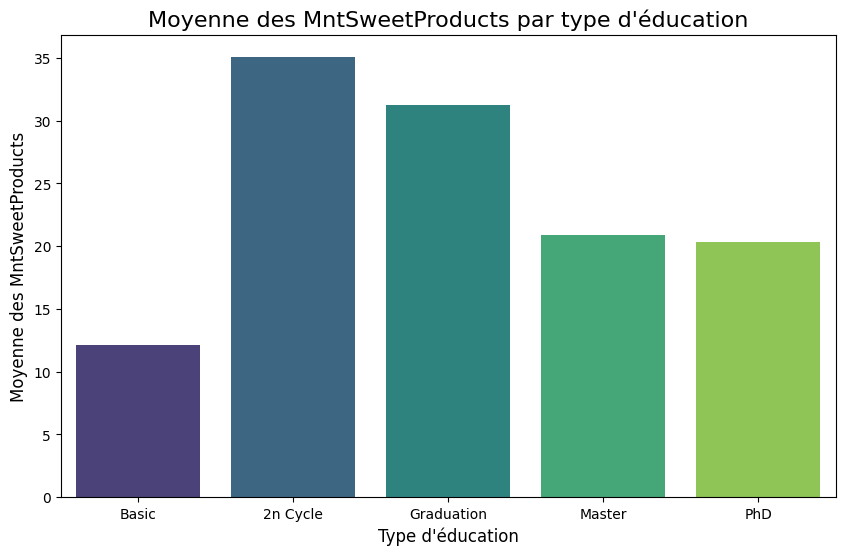

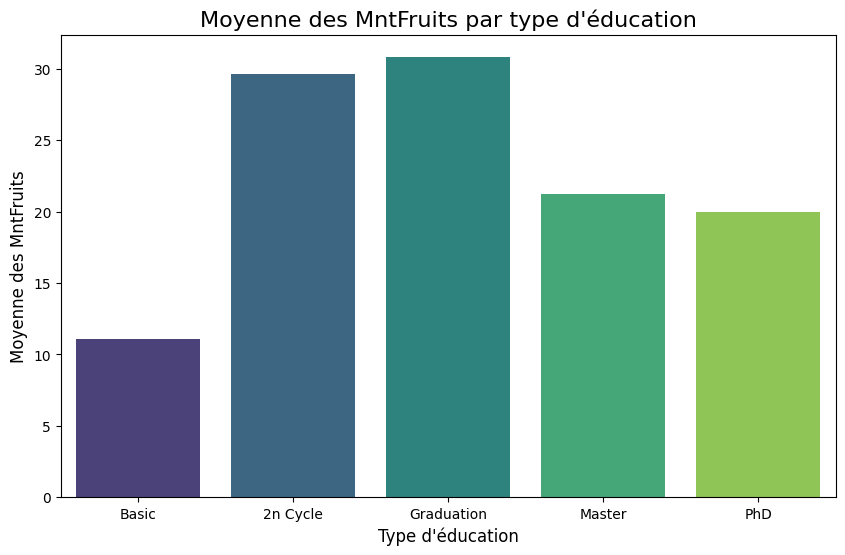

In [100]:
for product in products :
  plt.figure(figsize=(10,6))
  sns.barplot(data=df, x='Education', y= product, estimator='mean', ci=None, palette='viridis')


  plt.title(f"Moyenne des {product} par type d'éducation", fontsize=16)
  plt.xlabel("Type d'éducation", fontsize=12)
  plt.ylabel(f"Moyenne des {product}", fontsize=12)
  plt.show()

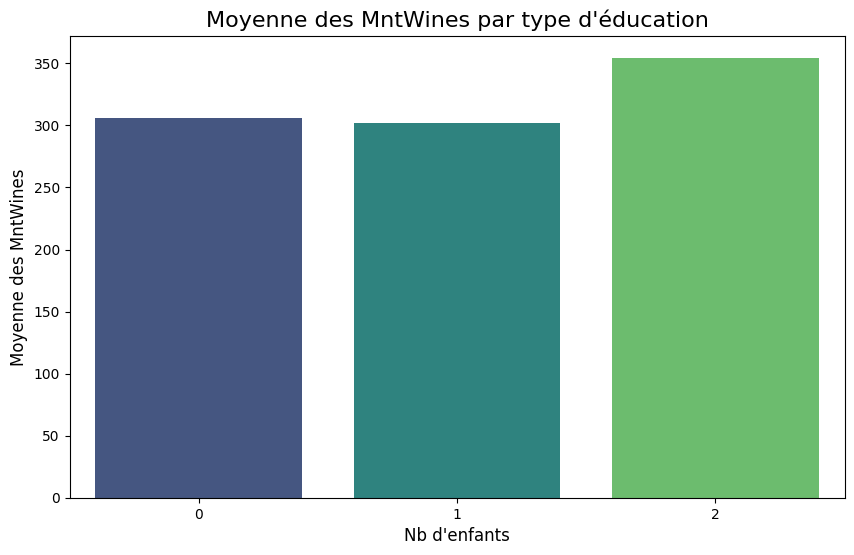

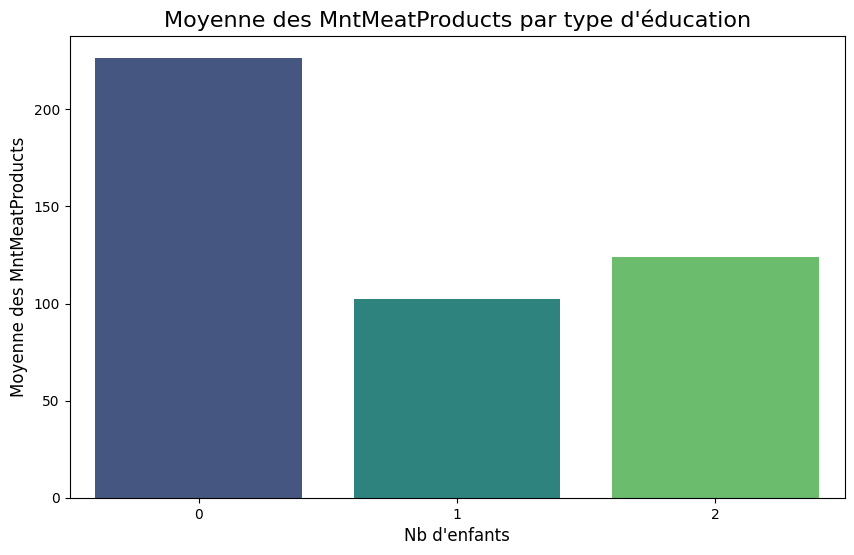

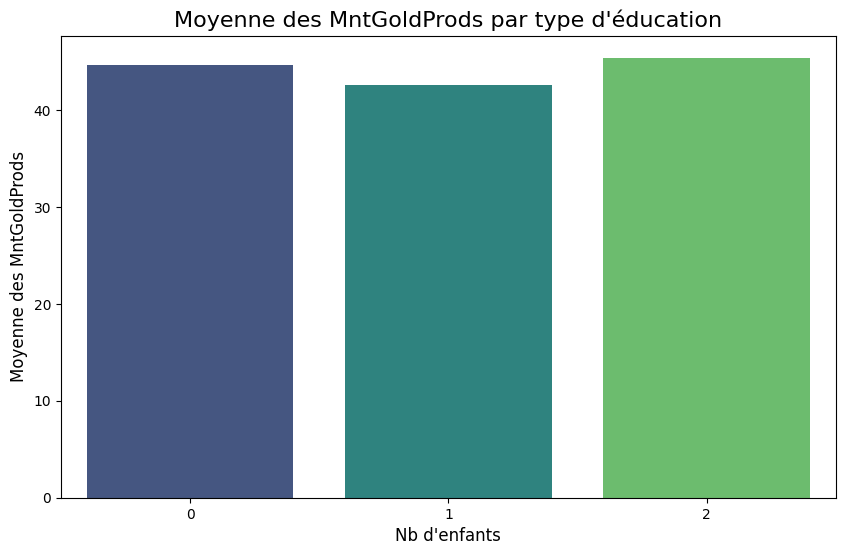

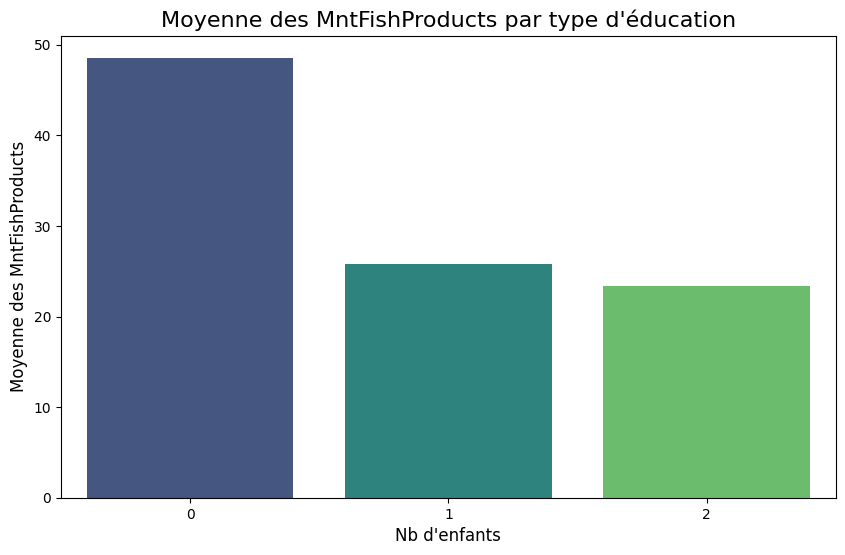

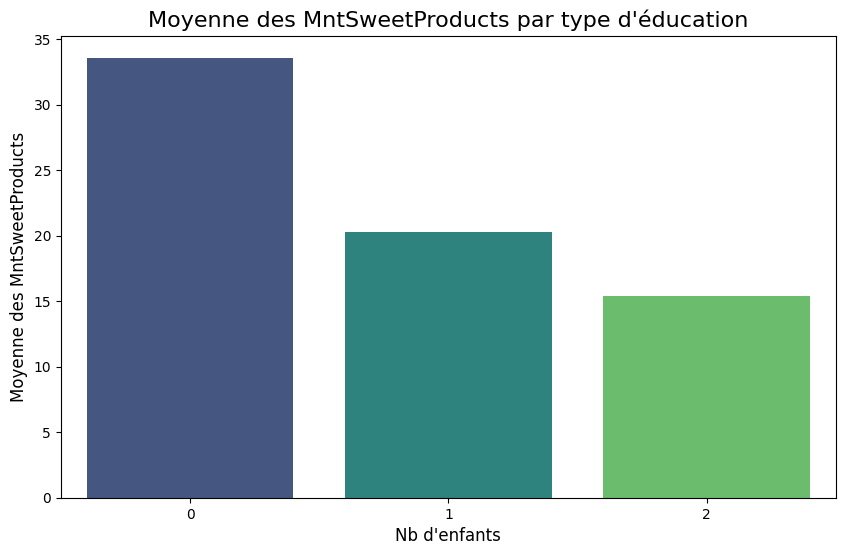

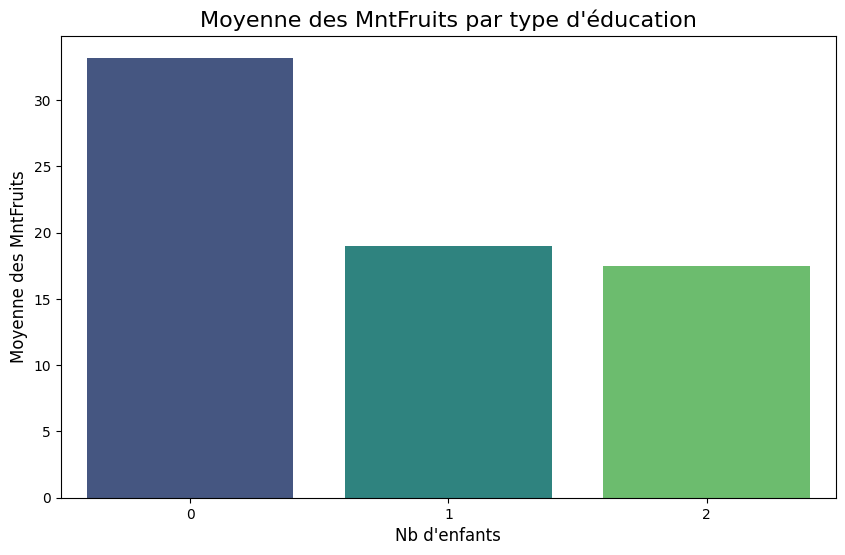

In [101]:
for product in products :
  plt.figure(figsize=(10,6))
  sns.barplot(data=df, x='Teenhome', y= product, estimator='mean', ci=None, palette='viridis')


  plt.title(f"Moyenne des {product} par type d'éducation", fontsize=16)
  plt.xlabel("Nb d'enfants", fontsize=12)
  plt.ylabel(f"Moyenne des {product}", fontsize=12)
  plt.show()

Pour mieux gérer les variables continues et réaliser des visuels et graphiques plus intuitifs, on réalise des subdivisions.

In [102]:
 def age_groupe(age):
    if age >= 60:
        return 5
    elif age >= 50 and age < 60:
        return 4
    elif age >= 40 and age < 50:
        return 3
    elif age >= 30 and age < 40:
        return 2
    elif age >= 20 and age < 30:
        return 1
    elif age < 20:
        return 0

def age_groupe_label(age):
    if age >= 60:
        return "above 60"
    elif age >= 50 and age < 60:
        return "50 - 60"
    elif age >= 40 and age < 50:
        return "40 - 50"
    elif age >= 30 and age < 40:
        return "30 - 40"
    elif age >= 20 and age < 30:
        return "20 - 30"
    elif age < 20:
        return "under 20"

def income_groupe(income):
  if income < 20000 :
    return "Really Low"
  elif income >= 20000 and income < 40000 :
    return "Low"
  elif income >= 40000 and income < 60000 :
    return "Average"
  elif income >= 60000 and income < 80000 :
    return "Average +"
  elif income >= 80000 and income < 100000 :
    return "High"
  elif income >= 100000 :
    return "Really high"

def sweet_consumption_groupe(sweet_consumption):
  if sweet_consumption < 1 :
    return "Low"
  elif sweet_consumption >= 1 and sweet_consumption < 8 :
    return "Average -"
  elif sweet_consumption >= 8 and sweet_consumption < 33 :
    return "Average +"
  elif sweet_consumption >= 33 :
    return "High"

def wine_consumption_groupe(wine_consumption):
  if wine_consumption < 24 :
    return "Low"
  elif wine_consumption >= 24 and wine_consumption < 176 :
    return "Average -"
  elif wine_consumption >= 176 and wine_consumption < 505 :
    return "Average +"
  elif wine_consumption >= 505 :
    return "High"

In [103]:
df["Year_Class"] = df["Age"].apply(lambda x: age_groupe(x))
df["Income_Class"] = df["Income"].apply(lambda x: income_groupe(x))
df['Sweet_Consumption_Class'] = df['MntSweetProducts'].apply(lambda x: sweet_consumption_groupe(x))
df["Wine_Consumption_Class"] = df['MntWines'].apply(lambda x: wine_consumption_groupe(x))

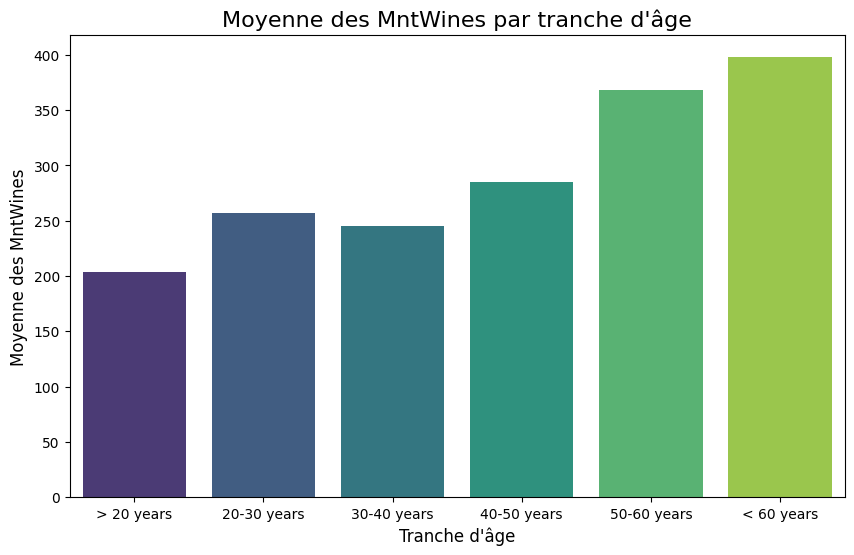

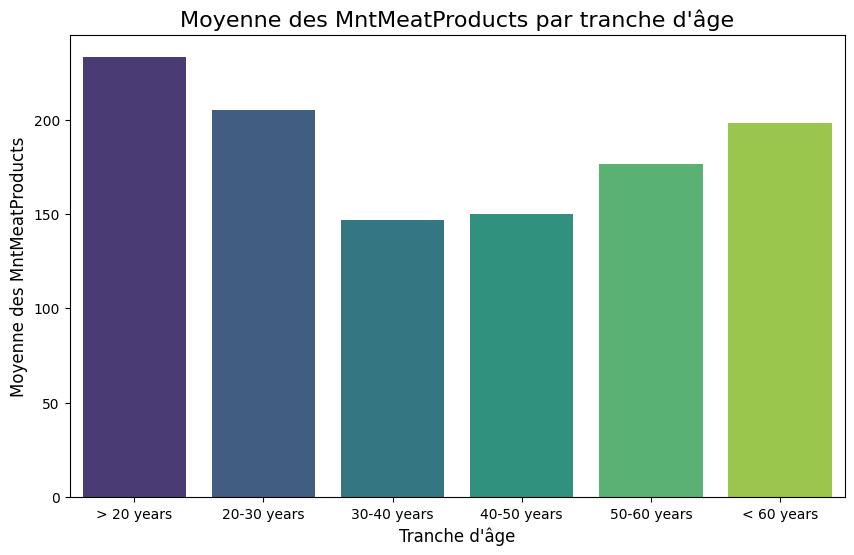

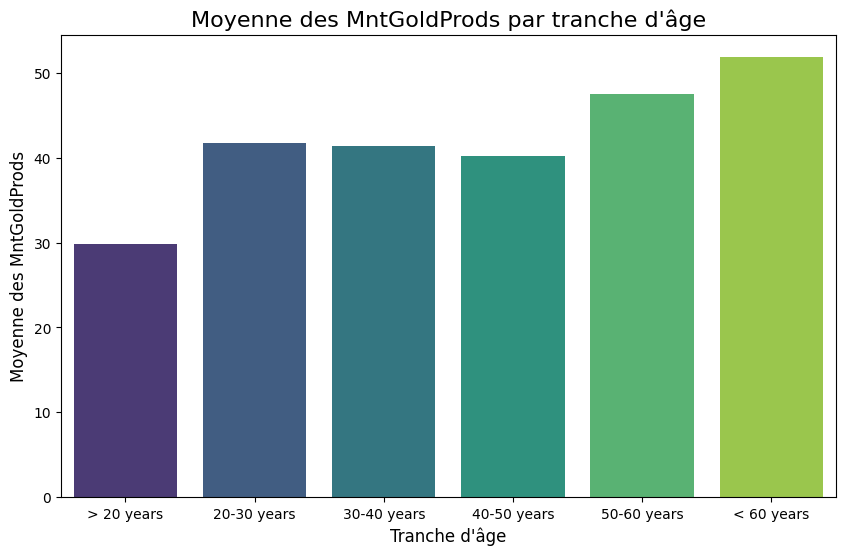

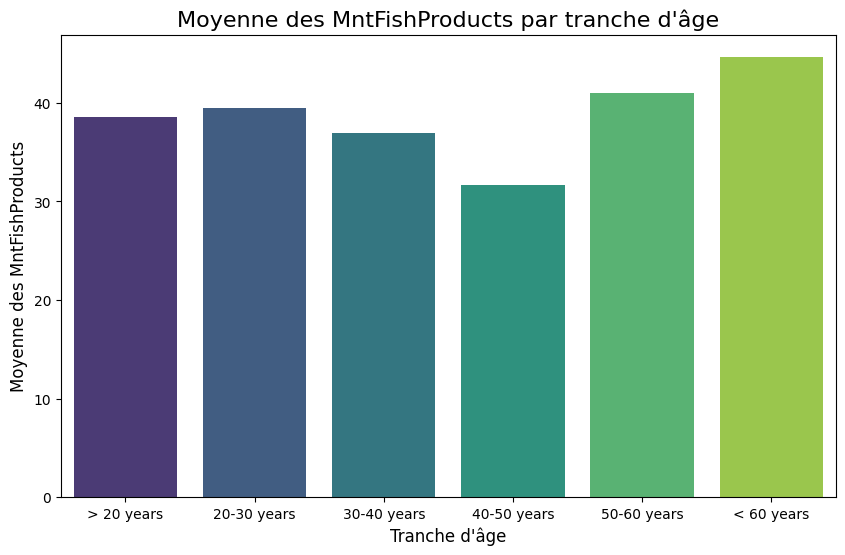

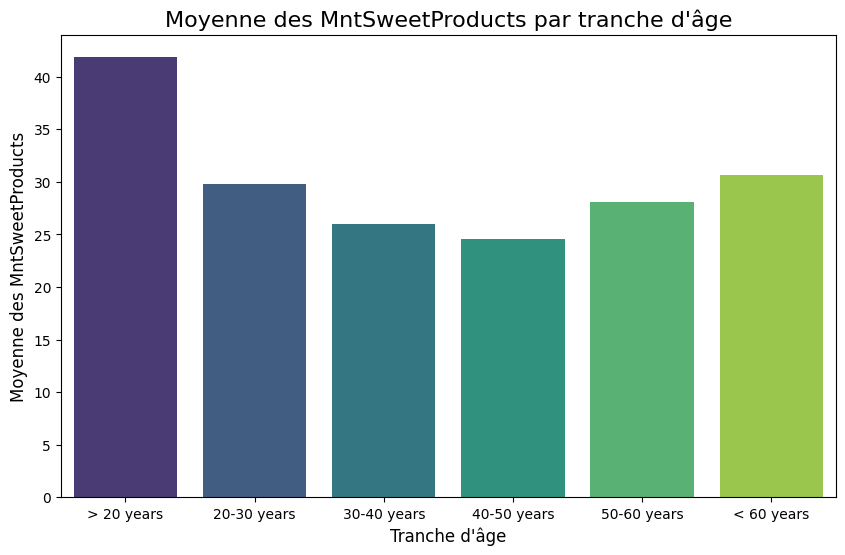

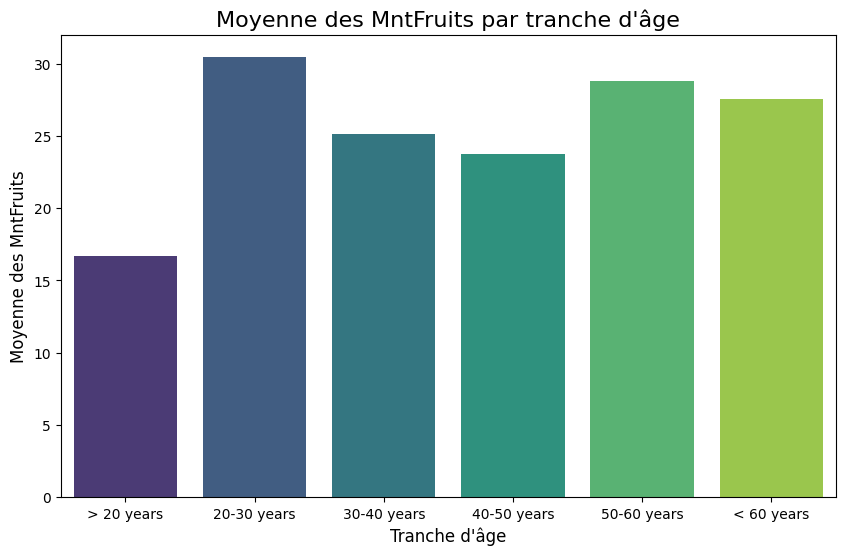

In [104]:
# on trie les années en ordre décroissant
sorted_years = df['Year_Class'].sort_values(ascending=True).unique()
year_labels = {5: "< 60 years", 4: "50-60 years", 3: "40-50 years", 2: "30-40 years", 1: "20-30 years", 0: "> 20 years"}

for product in products :
  plt.figure(figsize=(10,6))
  sns.barplot(data=df, x='Year_Class', y= product, estimator='mean', ci=None, palette='viridis')


  plt.xticks(ticks=range(len(sorted_years)), labels=[year_labels[year] for year in sorted_years], rotation=0)
  plt.title(f"Moyenne des {product} par tranche d'âge", fontsize=16)
  plt.xlabel("Tranche d'âge", fontsize=12)
  plt.ylabel(f"Moyenne des {product}", fontsize=12)
  plt.show()

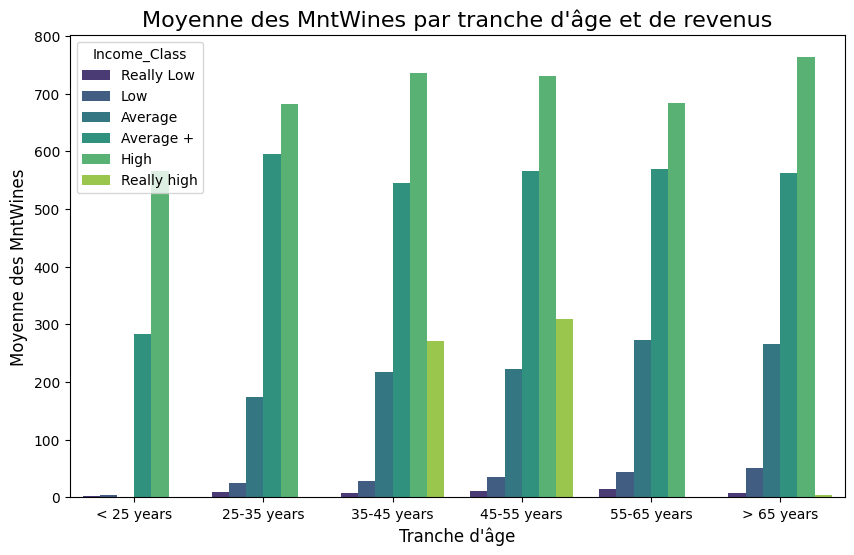

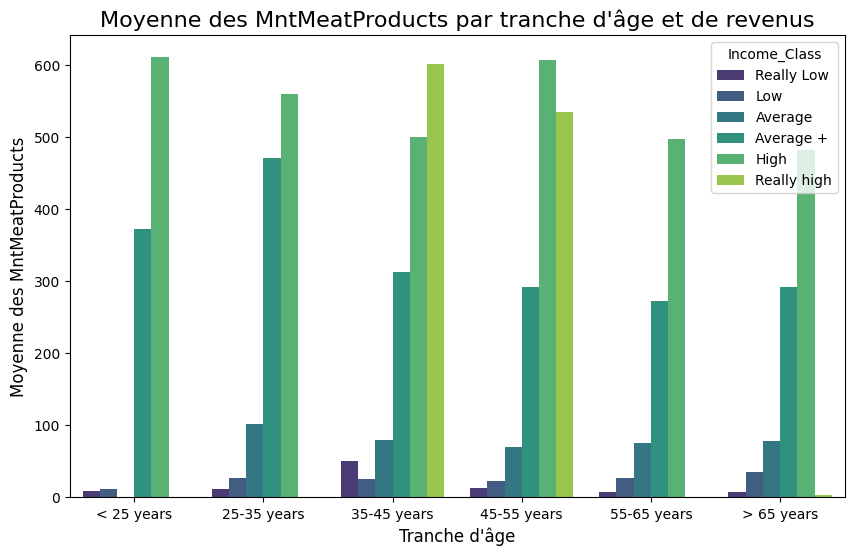

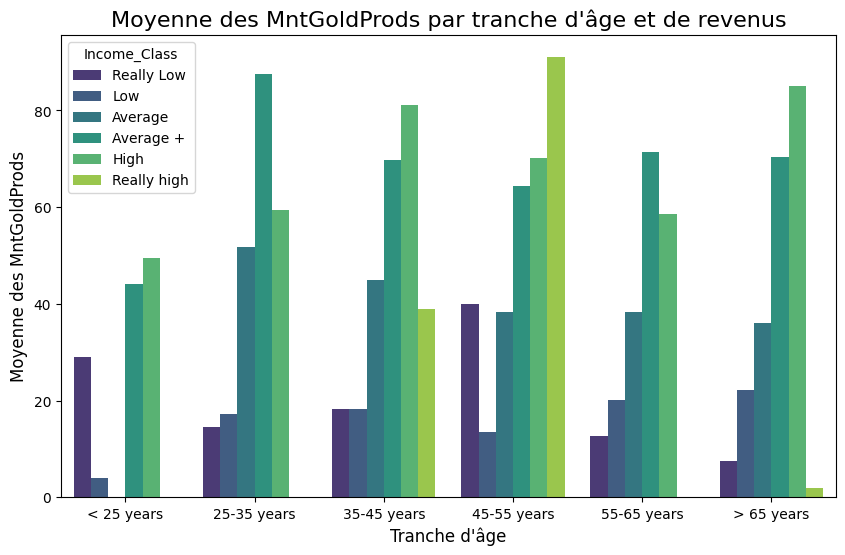

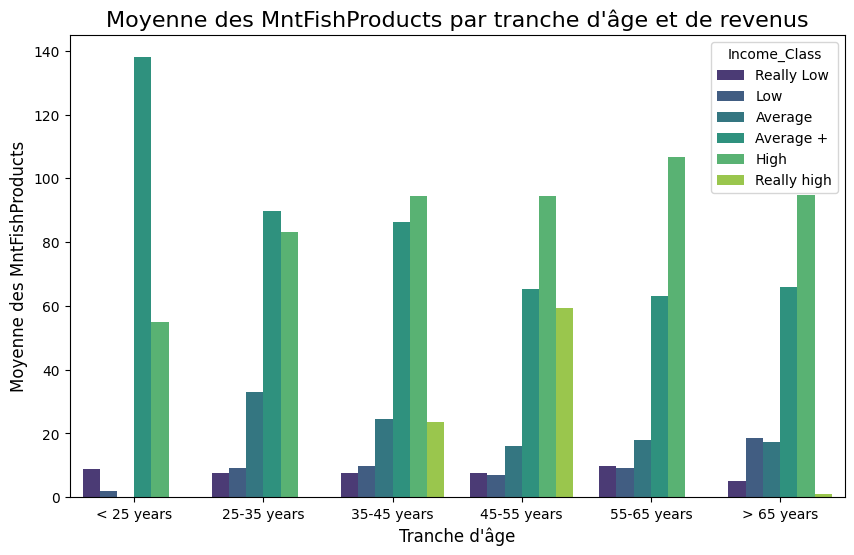

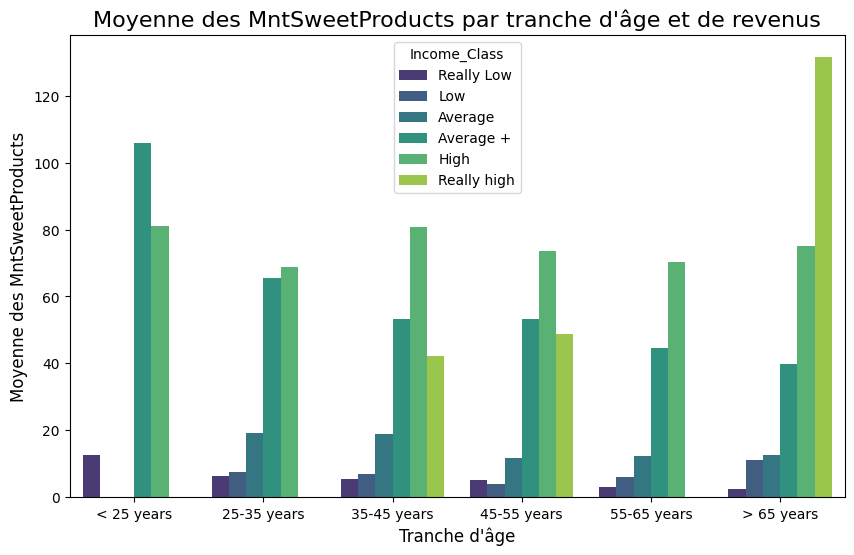

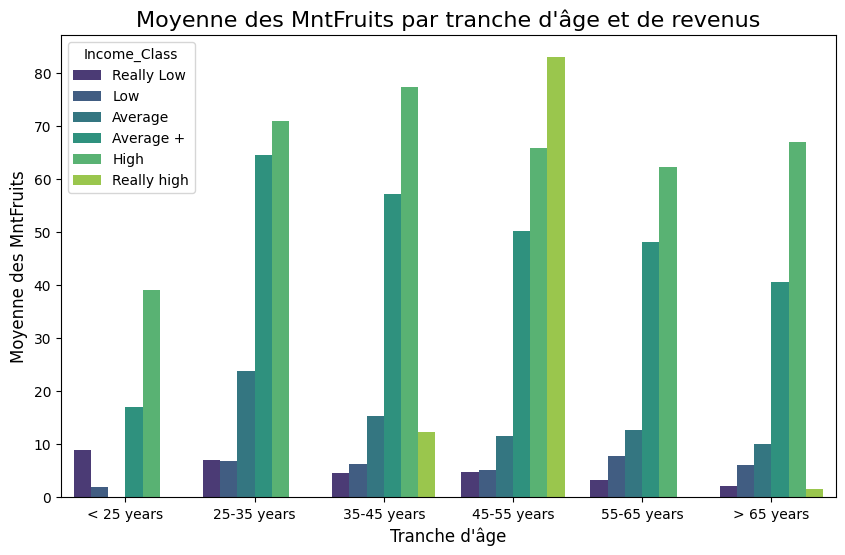

In [105]:
income_order = ["Really Low", "Low", "Average", "Average +", "High", "Really high"]

# Personnalisation des labels en abscisse
year_labels = {5: "> 65 years", 4: "55-65 years", 3: "45-55 years", 2: "35-45 years", 1: "25-35 years", 0: "< 25 years"}

# on trie les années en ordre décroissant
sorted_years = df['Year_Class'].sort_values(ascending=True).unique()

for product in products :
  plt.figure(figsize=(10,6))
  sns.barplot(data=df, x='Year_Class', y= product , estimator='mean', ci=None, hue="Income_Class", palette='viridis', hue_order=income_order)

  plt.xticks(ticks=range(len(sorted_years)), labels=[year_labels[year] for year in sorted_years], rotation=0)
  plt.title(f"Moyenne des {product} par tranche d'âge et de revenus", fontsize=16)
  plt.xlabel("Tranche d'âge", fontsize=12)
  plt.ylabel(f"Moyenne des {product}", fontsize=12)
  plt.show()


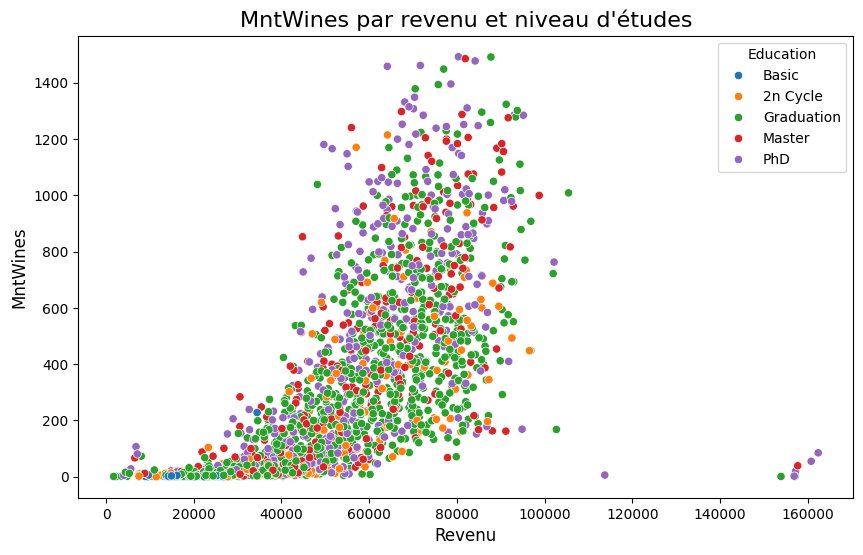

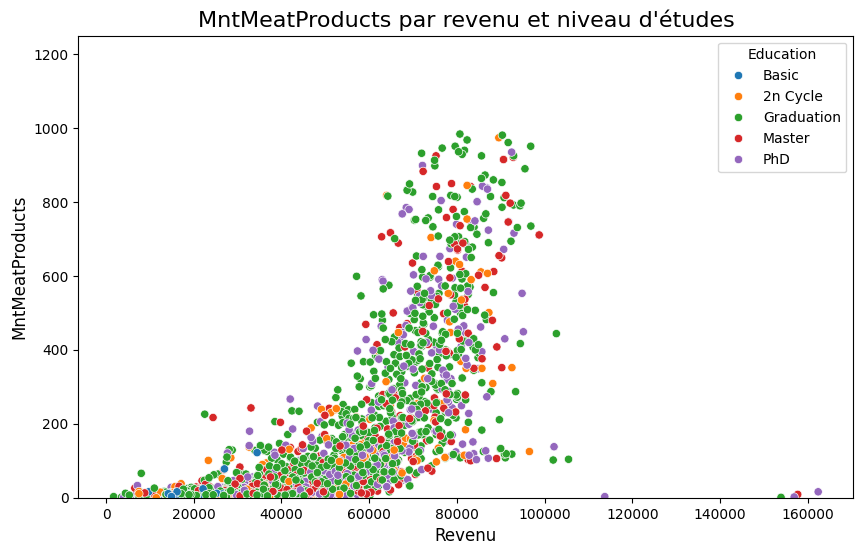

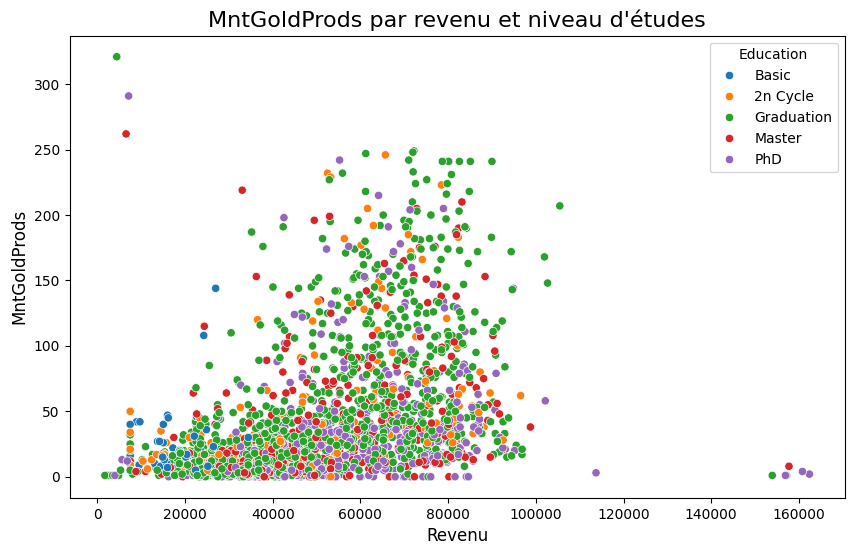

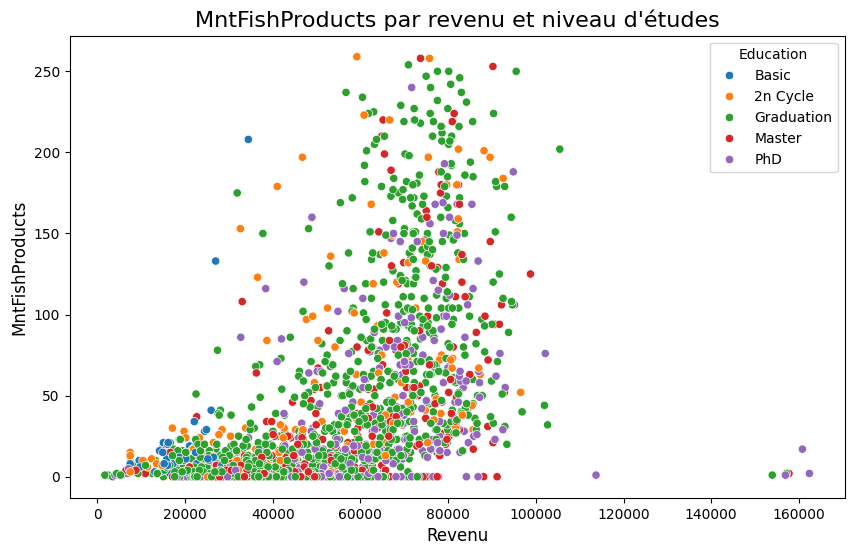

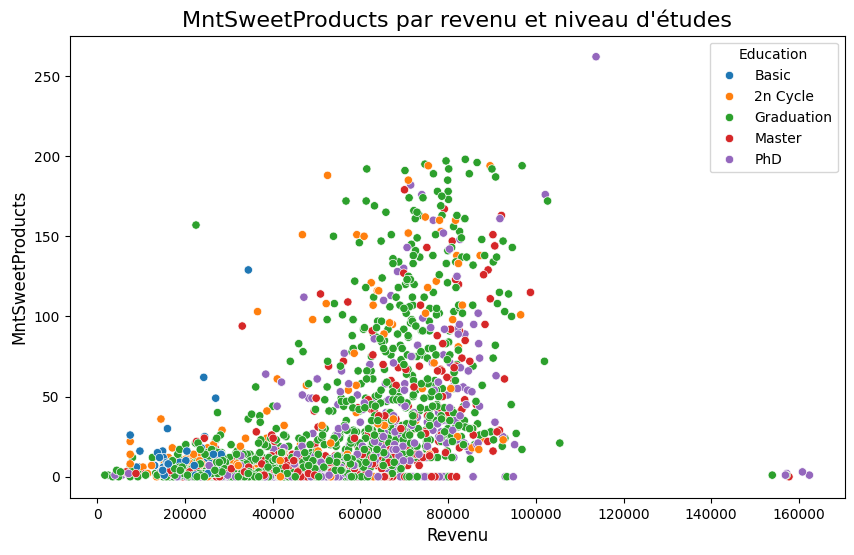

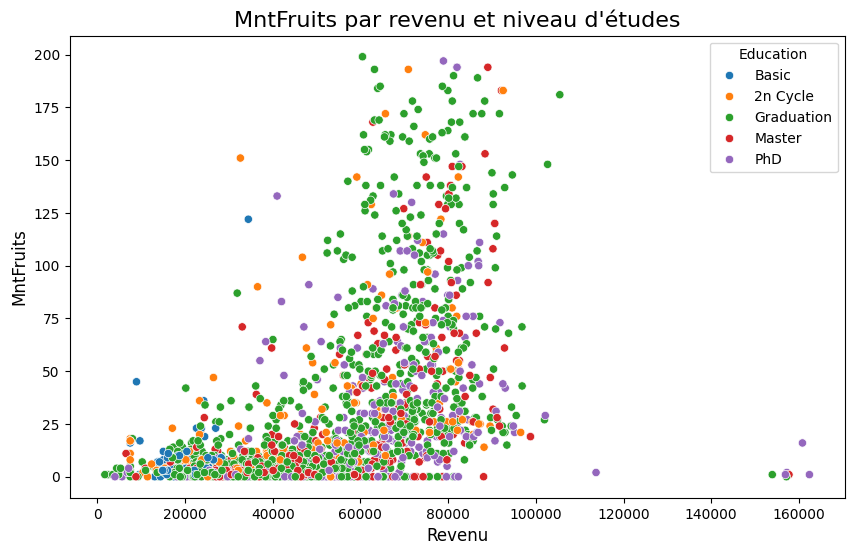

In [106]:
for product in products :
  plt.figure(figsize=(10,6))
  if product == "MntMeatProducts" :
    plt.ylim(0,1250)
    sns.scatterplot(data=df, x='Income', y=product, hue="Education")
  else :
    sns.scatterplot(data=df, x='Income', y=product, hue="Education")
  plt.title(f"{product} par revenu et niveau d'études", fontsize=16)
  plt.xlabel("Revenu", fontsize=12)
  plt.ylabel(f"{product}", fontsize=12)
  plt.show()

## FCA

In [107]:
df_corr = df[["Income","MntWines","Age"]]

<Axes: >

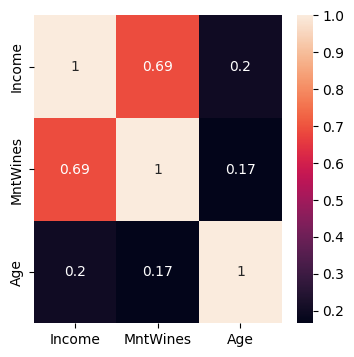

In [108]:
plt.figure(figsize=(4,4))
sns.heatmap(df_corr.corr(), annot=True)

In [109]:
df["Year_Class"] = df["Age"].apply(lambda x: age_groupe_label(x))

In [110]:
contingency_table_education_income = pd.crosstab(df['Education'], df['Income_Class'])
contingency_table_education_income

Income_Class,Average,Average +,High,Low,Really Low,Really high
Education,,,,,,
Basic,0,0,0,30,24,0
2n Cycle,51,45,19,65,18,0
Graduation,303,334,102,308,62,5
Master,125,95,36,93,14,1
PhD,161,148,46,108,9,6


In [111]:
!pip install prince
import prince
from scipy.stats import chi2

def fca(df,col1,col2):
  contingency_table= pd.crosstab(df[col1], df[col2])
  ca = prince.CA(n_components=3)
  ca = ca.fit(contingency_table)
  assert(sum(ca.percentage_of_variance_)>0.95)
  return ca

def distance_indep(df,col1,col2,alpha=0.95):
  ca=fca(df,col1,col2)
  contingency_table= pd.crosstab(df[col1], df[col2])
  row_coordinates = ca.row_coordinates(contingency_table)
  column_coordinates = ca.column_coordinates(contingency_table)
  row_totals = contingency_table.sum(axis=1)
  col_totals = contingency_table.sum(axis=0)
  grand_total = contingency_table.sum().sum()
  expected_values = np.outer(row_totals, col_totals) / grand_total
  expected_values = pd.DataFrame(expected_values, index=contingency_table.index, columns=contingency_table.columns)
  observed_values = contingency_table.values
  residuals = (observed_values - expected_values.values) / np.sqrt(expected_values.values)
  residuals_df = pd.DataFrame(residuals, index=contingency_table.index, columns=contingency_table.columns)
  distance_chi_deux=sum((residuals_df**2).sum())
  deg1 = (contingency_table.shape[0]-1)*(contingency_table.shape[1]-1)
  quantile = chi2.ppf(alpha, deg1)
  return {"quantile":quantile,"Distance_chi_deux":distance_chi_deux}

def reject_indep(df,col1,col2,alpha=0.95):# True: rejette l'hypothèse d'indépendance
  result=distance_indep(df,col1,col2,alpha)
  return result["quantile"]<result["Distance_chi_deux"]


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [112]:
def plot_FCA(df, column1, column2):

    # on crée la table de contingence
    contingency_table = pd.crosstab(df[column1], df[column2])
    n = np.sum(contingency_table.values)
    contingency_proba = contingency_table / n

    # on calcule les probabilités marginales
    Pi = contingency_proba.sum(axis=1)
    Pj = contingency_proba.sum(axis=0)

    # calcul de R
    R = pd.DataFrame(np.zeros(contingency_proba.shape), columns=contingency_proba.columns, index=contingency_proba.index)
    for i in range(contingency_proba.shape[0]):
        for j in range(contingency_proba.shape[1]):
            pij = contingency_proba.iloc[i, j]
            R.iloc[i, j] = np.sqrt(n) * (pij - Pi[i] * Pj[j]) / np.sqrt(Pi[i] * Pj[j])

    # décomposition SVD
    U, S, Vt = np.linalg.svd(R.values, full_matrices=False)

    # calcul du pourcentage de variance expliquée
    explained_variance = (S ** 2) / np.sum(S ** 2) * 100


    row_coords = U[:, :2] * S[:2]
    col_coords = Vt.T[:, :2] * S[:2]


    plt.figure(figsize=(5, 5))

    # points des lignes
    plt.scatter(row_coords[:, 0], row_coords[:, 1], color='red', label=column1)
    for i, txt in enumerate(contingency_table.index):
        plt.annotate(txt, (row_coords[i, 0] + 0.02, row_coords[i, 1] + 0.02))

    # points des colonnes
    plt.scatter(col_coords[:, 0], col_coords[:, 1], color='blue', label=column2)
    for i, txt in enumerate(contingency_table.columns):
        plt.annotate(txt, (col_coords[i, 0] + 0.02, col_coords[i, 1] + 0.02))


    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.legend()
    plt.title(f'FCA {column1} / {column2}', fontsize=16)
    plt.xlabel(f'Dimension 1 ({explained_variance[0]:.2f}%)')
    plt.ylabel(f'Dimension 2 ({explained_variance[1]:.2f}%)')
    plt.grid()
    plt.show()

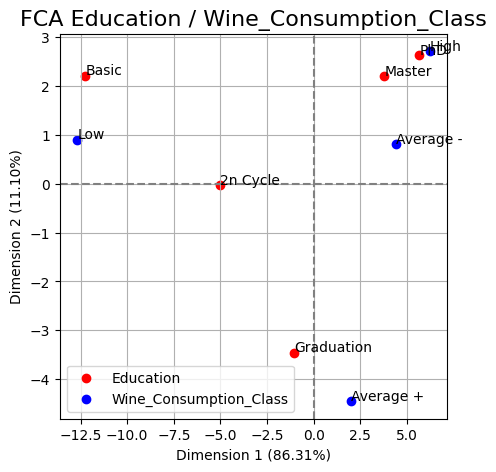

In [113]:
plot_FCA(df, "Education", "Wine_Consumption_Class")

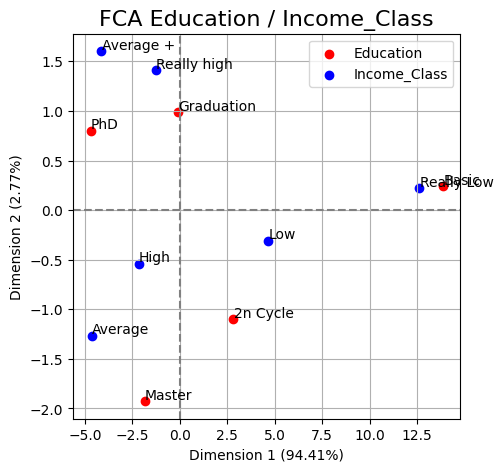

In [114]:
plot_FCA(df, "Education", "Income_Class")

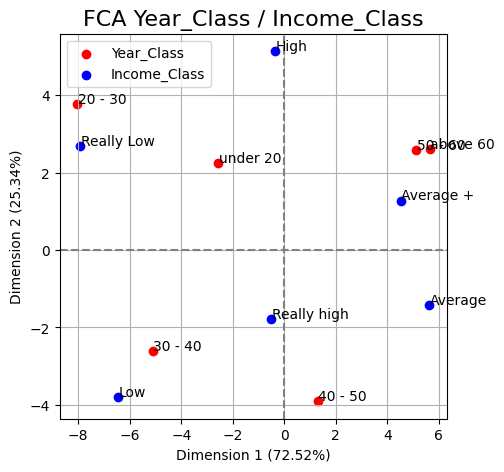

In [115]:
plot_FCA(df, "Year_Class", "Income_Class")

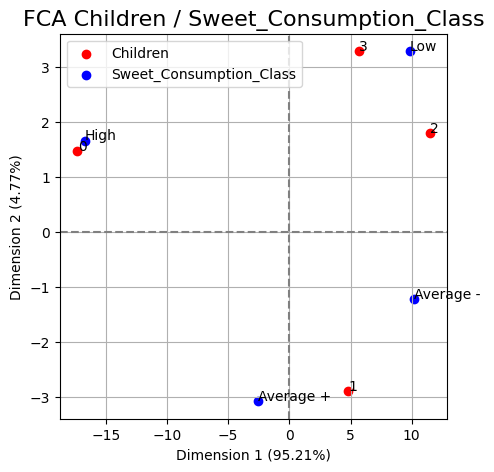

In [116]:
plot_FCA(df, "Children", "Sweet_Consumption_Class")

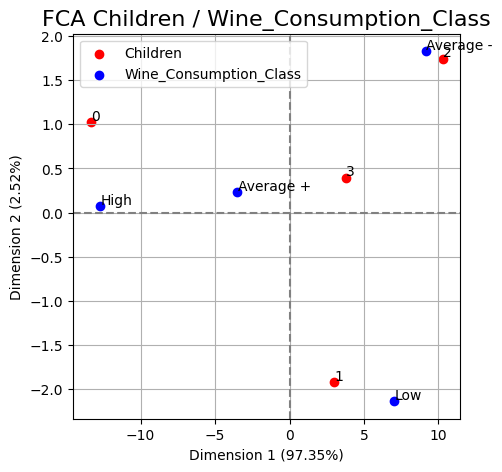

In [117]:
plot_FCA(df, "Children", "Wine_Consumption_Class")

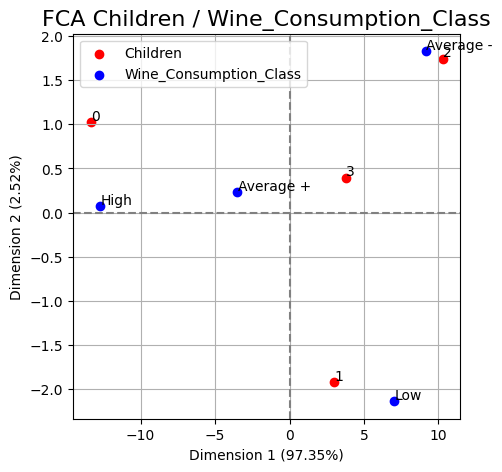

In [118]:
plot_FCA(df, "Children", "Wine_Consumption_Class")

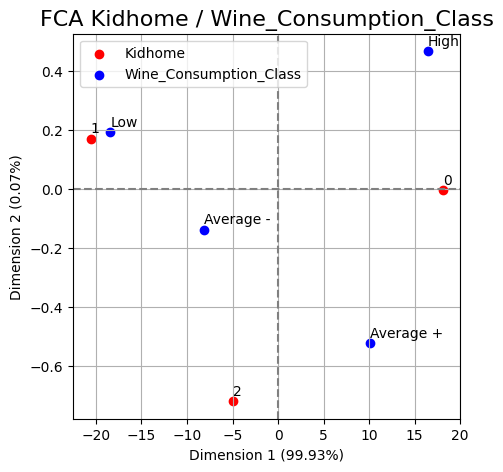

In [119]:
plot_FCA(df, "Kidhome", "Wine_Consumption_Class")

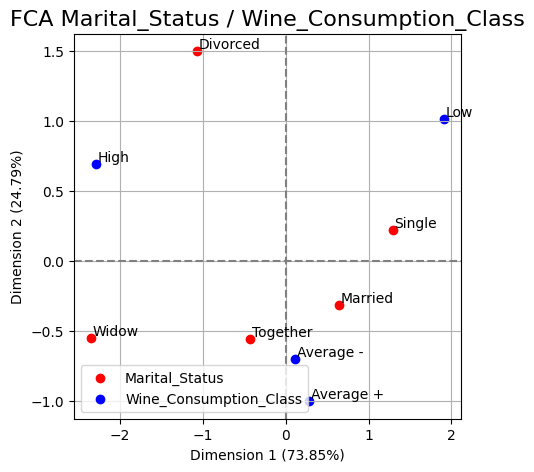

In [120]:
plot_FCA(df, "Marital_Status", "Wine_Consumption_Class")

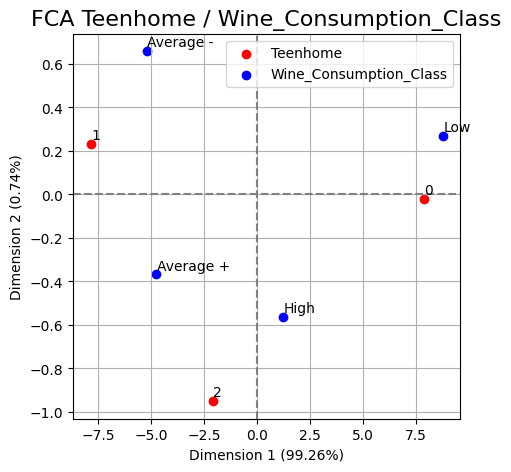

In [121]:
plot_FCA(df, "Teenhome", "Wine_Consumption_Class")

In [122]:
reject_indep(df,"Education","Income_Class")

True

In [123]:
reject_indep(df,"Children","Wine_Consumption_Class")

True

In [124]:
reject_indep(df,"Children","Sweet_Consumption_Class")

True

In [125]:
filtre = df[(df['Education'].isin(['PhD', 'Master'])) & (df['Kidhome'] == 0)]

# calcul de la moyenne de la colonne 'Conso' pour ces lignes
moyenne_conso = filtre['MntWines'].mean()

print(f"La moyenne de consommation est : {moyenne_conso}")

La moyenne de consommation est : 540.6626984126984


In [126]:
somme_conso = filtre['MntWines'].sum()

print(f"La somme de consommation est : {somme_conso}")

La somme de consommation est : 272494


In [127]:
filtre.shape

(504, 37)

In [128]:
filtre2 = df[df["Year_Class"].isin(["50 - 60","40 - 50"])]

filtre2["MntWines"].mean()

318.79822222222225

In [129]:
filtre2.shape

(1125, 37)

In [130]:
somme2_conso = filtre2['MntWines'].sum()

print(f"La somme de consommation est : {somme2_conso}")

La somme de consommation est : 358648


## Façon d'acheter

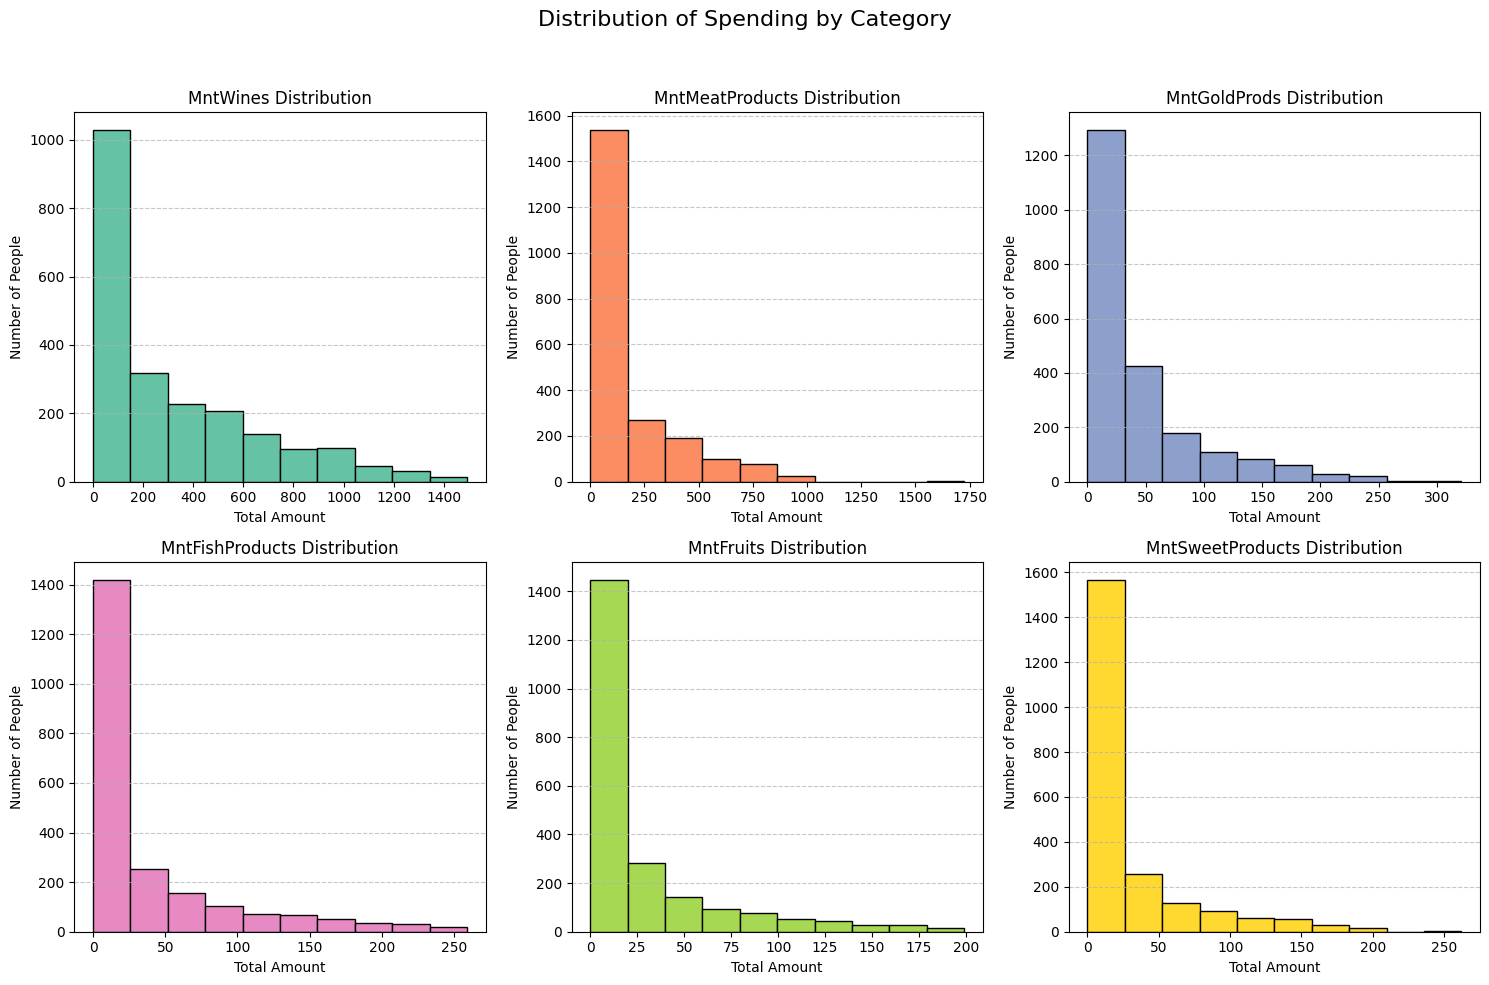

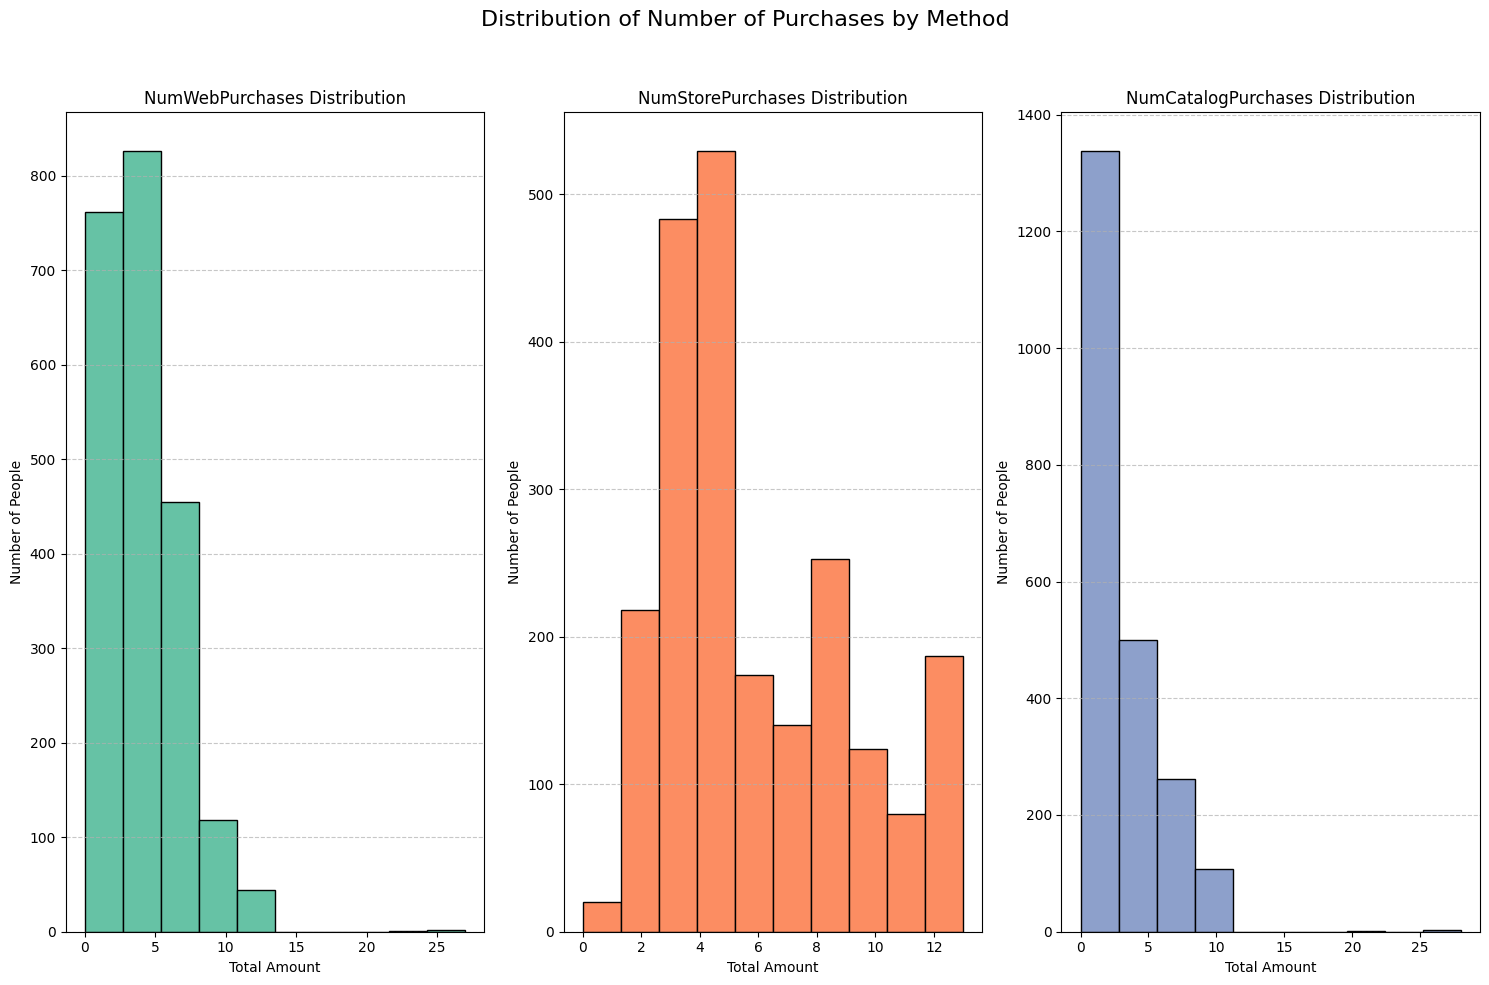

In [131]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

# on définit les variables pour la Canonical Correlation Analysis (CCA)
purchase_columns = ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']
spending_columns = ['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntFruits', 'MntSweetProducts']

#extraction des 2 groupes de variables
X = df[purchase_columns]
Y = df[spending_columns]

def plot_histograms(columns, title, ncols=3, figsize=(15, 10), palette="Set2", bins=10):
    nrows = -(-len(columns) // ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()


    colors = sns.color_palette(palette, len(columns))

    for i, column in enumerate(columns):
        axes[i].hist(df[column], bins=bins, color=colors[i % len(colors)], edgecolor="black")
        axes[i].set_title(f"{column} Distribution")
        axes[i].set_xlabel("Total Amount")
        axes[i].set_ylabel("Number of People")
        axes[i].grid(axis="y", linestyle="--", alpha=0.7)

    # on enlève les subplots unitilisés
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # adapter la mise en page du titre
    plt.show()


plot_histograms(spending_columns, title="Distribution of Spending by Category")
plot_histograms(purchase_columns, title="Distribution of Number of Purchases by Method")

## CCA


Canonical Correlation Coefficients: 0.2757956714560274

Canonical Weights for Purchase Methods:
                            C1        C2        C3
NumWebPurchases      0.256414  0.715876 -0.649440
NumStorePurchases    0.465848  0.497188  0.731977
NumCatalogPurchases  0.846899 -0.490230 -0.206003

Canonical Weights for Spending Categories:
                         C1        C2        C3
MntWines          0.791916  0.466439  0.084589
MntMeatProducts   0.498941 -0.857897 -0.008994
MntGoldProds      0.250708  0.124470 -0.728563
MntFishProducts   0.146156 -0.041815  0.428216
MntFruits         0.098350  0.108248  0.526769
MntSweetProducts  0.173311  0.132244  0.033250


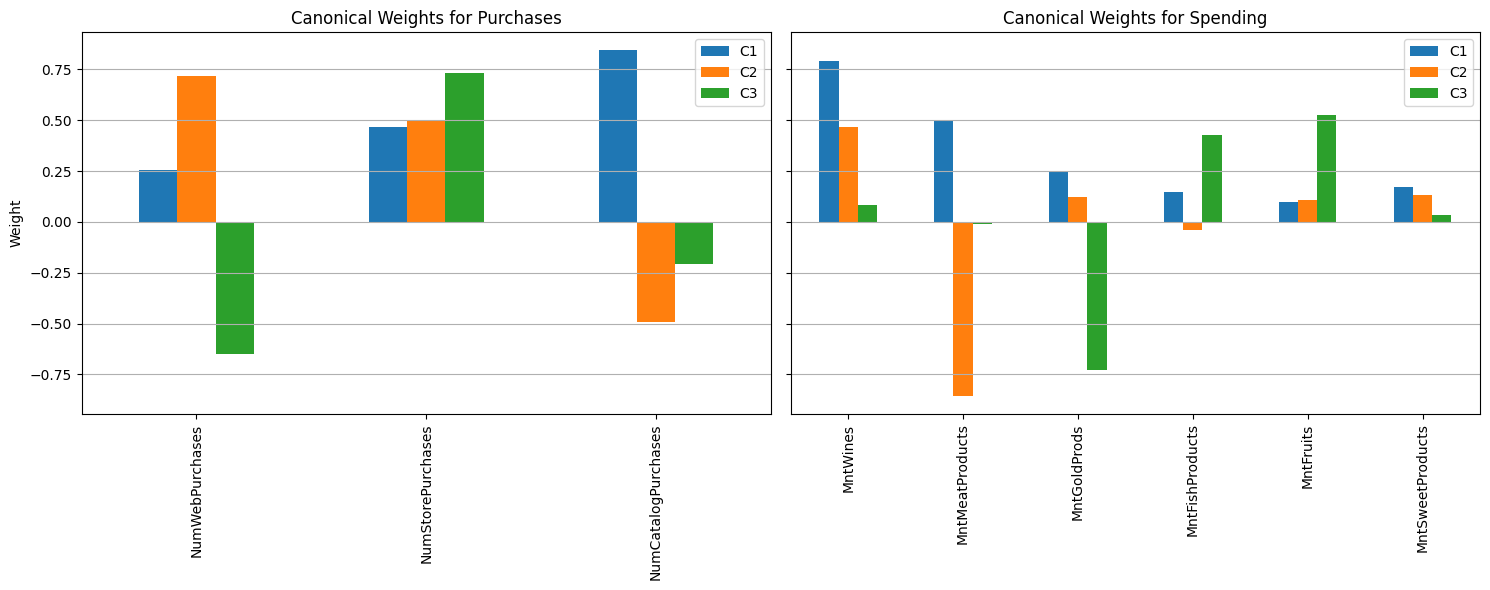

In [132]:
# on s'assure que les 2 matrices font la même taille
min_length = min(len(X), len(Y))
X = X.iloc[:min_length]
Y = Y.iloc[:min_length]

# normalisation
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

# CCA
cca = CCA(n_components=3)
X_c, Y_c = cca.fit_transform(X_scaled, Y_scaled)

# on affiche les coéfficients
canonical_corrs = cca.score(X_scaled, Y_scaled)
print("Canonical Correlation Coefficients:", canonical_corrs)

# poids de la CCA
X_weights = pd.DataFrame(cca.x_weights_, index=purchase_columns, columns=['C1', 'C2', 'C3'])
Y_weights = pd.DataFrame(cca.y_weights_, index=spending_columns, columns=['C1', 'C2', 'C3'])

print("\nCanonical Weights for Purchase Methods:\n", X_weights)
print("\nCanonical Weights for Spending Categories:\n", Y_weights)

# on affiche les poids
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

X_weights.plot(kind='bar', ax=axes[0], title="Canonical Weights for Purchases", legend=True)
axes[0].set_ylabel("Weight")
axes[0].grid(axis='y')

Y_weights.plot(kind='bar', ax=axes[1], title="Canonical Weights for Spending", legend=True)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

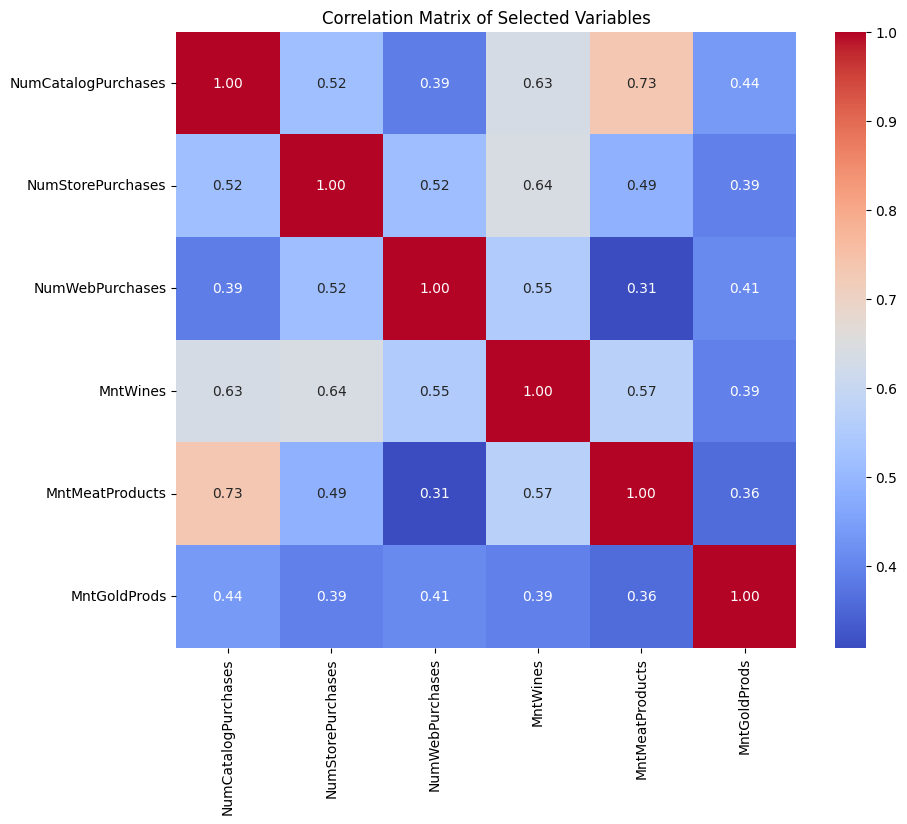

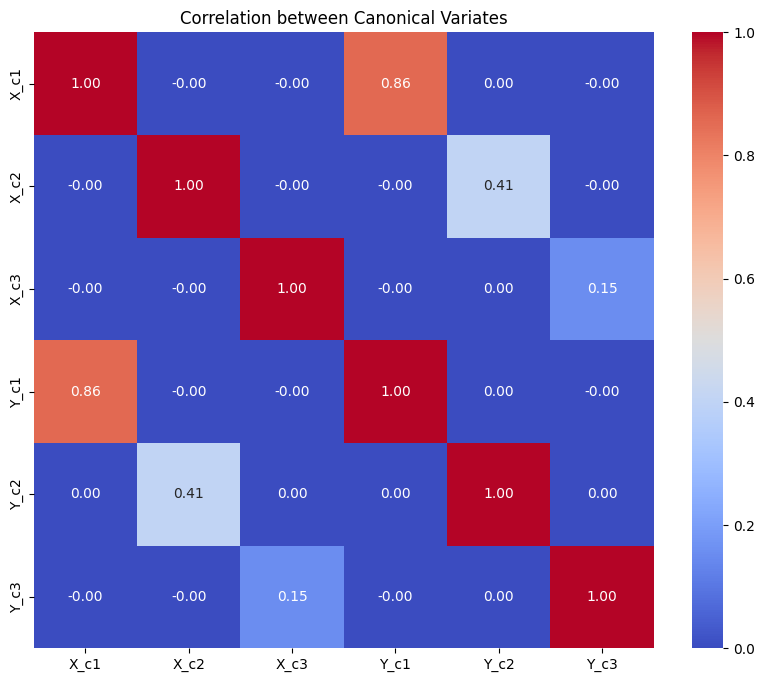

In [133]:
cols_to_correlate = ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'MntWines', 'MntMeatProducts', 'MntGoldProds']
correlation_matrix = df[cols_to_correlate].corr()

# heatmap correlation avant CCA
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.savefig("correlation.png")
plt.show()


correlation_matrix = np.corrcoef(X_c[:, :3].T, Y_c[:, :3].T)

# heatmap correlation après CCA
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['X_c1', 'X_c2', 'X_c3', 'Y_c1', 'Y_c2', 'Y_c3'],
            yticklabels=['X_c1', 'X_c2', 'X_c3', 'Y_c1', 'Y_c2', 'Y_c3'])
plt.title('Correlation between Canonical Variates')
plt.savefig("correlationcanonique.png")
plt.show()

## Test du chi2

In [134]:
p = 3
q = 6
n = len(X)
alpha = 0.01

canonical_mat = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(3)]

results = []
num_corrs = len(canonical_mat)
for k in range(1, num_corrs + 1):
    lambda_k = canonical_mat[:k]
    chi2_stat = -(n - (k + k + 3) / 2) * np.log(np.prod(1 - np.array(lambda_k) ** 2))
    dof = k ** 2  # degrés de liberté
    p_value = 1 - chi2.cdf(chi2_stat, dof)

    # on ajoute le résultat du test à la liste
    results.append({
        "Test": f"Significance of first {k} canonical correlations",
        "Chi2 Statistique": chi2_stat,
        "Degrés de Liberté": dof,
        "Chi2 quantile 99%": chi2.ppf(1 - alpha, dof),
        "Significatif (alpha=0.01)": "Oui" if chi2_stat > chi2.ppf(1 - alpha, dof) else "Non"
    })

results_df = pd.DataFrame(results)

# on affiche les résultats
import IPython.display as display
display.display(
    results_df.style.background_gradient(cmap="coolwarm", subset=["Chi2 Statistique"])
    .set_caption("Test de significativité des corrélations canoniques (Chi2)")
    .format(precision=10)  # Control precision for Chi2 statistics
)

,Test,Chi2 Statistique,Degrés de Liberté,Chi2 quantile 99%,Significatif (alpha=0.01)
0,Significance of first 1 canonical correlations,2908.9752288488,1,6.6348966010,Oui
1,Significance of first 2 canonical correlations,3303.5093142175,4,13.2767041360,Oui
2,Significance of first 3 canonical correlations,3355.3687539299,9,21.6659943335,Oui
